## Exercise Raster Transforms, Band Math & Algorithms

In this exercise module we use concepts from our transforms, band math and raster algorithms labs.

The Landsat-8 data can be obtained from https://landsat-pds.s3.amazonaws.com/L8/042/031/LC80420312013156LGN00/index.html

In this excercise we calculate a vegetation index similar to NDVI, 
called **Enhanced Vegetation Index** (EVI). 
More on EVI at https://en.wikipedia.org/wiki/Enhanced_vegetation_index.

Calculation of EVI involves 3 raster bands `Red, Blue, and Near Infrared`. 
The following equation represents the calculation of EVI.
\begin{equation}
EVI = G\times\frac{NIR-RED}{NIR+C_1 \times RED - C_2 \times BLUE + L}
\end{equation}

For Landsat-8 dataset, EVI is given as

\begin{equation}
EVI = 2.5\times\frac{Band_5-Band_4}{Band_5+6 \times Band_4 - 7.5 \times Band_2 + 1}
\end{equation}



### Task: Obtain the required bands 
Obtain 2<sup>nd</sup>, 4<sup>th</sup>, and 5<sup>th</sup>  bands of Landsat-8 collection
Store the band images in `../temp/LC80420312013156LGN00/` folder.

_Note: Make sure you are downloading files with `.TIF` extension only_

You should end up with three files: 

```Bash
$ ls -lt temp/LC80420312013156LGN00/
-rw-r--r-- 1 scottgs dsa_user 62757207 Feb 19 20:28 nearIRband.TIF
-rw-r--r-- 1 scottgs dsa_user 61844135 Feb 19 20:28 redband.TIF
-rw-r--r-- 1 scottgs dsa_user 58793826 Feb 19 20:28 blueband.TIF
```

In [1]:
# M6:E1:Cell01
# Add your code to download the files
#--------------------------------

# Imports
import urllib.request
import shutil
from pathlib import Path


##### BLUE #######

# File URL and Local File Path Variables - blue band
BlueBAND_URL = 'https://landsat-pds.s3.amazonaws.com/L8/042/031/LC80420312013156LGN00/LC80420312013156LGN00_B2.TIF'
local_file_name = 'blueband.TIF'

file_path = Path('../temp/LC80420312013156LGN00/')
file_path /= local_file_name
# Download and Save - Red band

with urllib.request.urlopen(BlueBAND_URL) as response,file_path.open(mode='w+b') as outfile:
    shutil.copyfileobj(response,outfile)

##### RED #######

# File URL and Local File Path Variables - Red band
RedBAND_URL = 'https://landsat-pds.s3.amazonaws.com/L8/042/031/LC80420312013156LGN00/LC80420312013156LGN00_B4.TIF'
local_file_name = 'redband.TIF'
                          
file_path = Path('../temp/LC80420312013156LGN00/')
file_path /= local_file_name
# Download and Save - Red band

with urllib.request.urlopen(RedBAND_URL) as response,file_path.open(mode='w+b') as outfile:
    shutil.copyfileobj(response,outfile)

##### NIR #######

# File URL and Local File Path Variables - near-infrared band
NirBAND_URL = 'https://landsat-pds.s3.amazonaws.com/L8/042/031/LC80420312013156LGN00/LC80420312013156LGN00_B5.TIF'
local_file_name='nearIRband.TIF'
                
file_path = Path('../temp/LC80420312013156LGN00/')
file_path /= local_file_name

# Download and Save - near-infrared band
with urllib.request.urlopen(NirBAND_URL) as response,file_path.open(mode='w+b') as outfile:
    shutil.copyfileobj(response,outfile)


We then expect, if all went well, that we can load the file with the next cell.

<span style="background:yellow">If you get any errors </span>, carefully resolve your issues until your directory structure under module5 for the `temp` folder matches in above code!


In [2]:
###### TRY TO GET THIS CELL TO RUN WITHOUT CHANGES

import rasterio

src = rasterio.open('../temp/LC80420312013156LGN00/redband.TIF')
redband = src.read()

Now that we successfully downloaded the `red`, `blue` and `nearIR` bands, we shall downsample the image to have $\frac{1}{8}^{th}$ height and $\frac{1}{10}^{th}$ width of the original image.

### Task: Build destination transformation


In [9]:
src.transform

/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2910: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


[326385.0, 30.0, 0.0, 4735515.0, 0.0, -30.0]

In [4]:
# M6:E1:Cell02
# Build destination transformation
#--------------------------------

# Imports 
import numpy as np


### PULL AND MODIFY THE TRANSFORM
dst_transform = src.transform.copy()

dst_transform[1] = dst_transform[1]*10
dst_transform[5] = dst_transform[5]*10

height=round(redband.shape[1]/10)
width= round(redband.shape[2]/10)
downsampled= np.empty(shape=(redband.shape[0],height,width),dtype=np.uint16)

/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2910: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
##### M6:E1:Cell03
####-------------------------------
# Update kwargs
####--------------------------------


kwargs = src.meta.copy()
kwargs.update({     
    'crs':src.crs,
    'transform':dst_transform,
    'width': width,
    'height':height
})


### Update kwargs



### Task : Use reprojection to downsample and save it as `../temp/LC80420312013156LGN00/redband_downsampled.TIF`

In [7]:
# M6:E1:Cell04

# Imports
from rasterio.warp import reproject,RESAMPLING

#### Reproject and save downsampled raster
with  rasterio.open('../temp/LC80420312013156LGN00/redband_downsampled.TIF','w',**kwargs) as dst:
    reproject(
        source = rasterio.band(src,1),
        destination = rasterio.band(dst,1),
        src_transform = src.transform,
        src_crs = src.crs,
        dst_transform = dst_transform,
        dst_crs = src.crs,
        resampling = RESAMPLING.nearest)

/usr/lib64/python3.4/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)
/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2910: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib64/python3.4/site-packages/rasterio/warp.py:250: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  if src_transform and guard_transform(src_transform).is_identity:
/usr/lib64/python3.4/site-packages/rasterio/warp.py:252: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  if dst_transform and guard_transform(dst_transform).is_identity:
/usr/lib64/python3.4/site-packages/rasterio/warp.py:256: FutureWarning: GDAL-style transforms are depr

Make sure the size of the images is 1&times;939&times;769. If your downsampled raster has the correct size, proceed with to the next cell.

### Downsample `blueband`

In [8]:
###### TRY TO GET THIS CELL TO RUN WITHOUT CHANGES
src = rasterio.open('../temp/LC80420312013156LGN00/blueband.TIF')
blueband = src.read()

# Reproject and save downsampled raster

with rasterio.open('../temp/LC80420312013156LGN00/blueband_downsampled.TIF','w', **kwargs) as dst:
    reproject(
        source = rasterio.band(src,1), 
        destination = rasterio.band(dst,1),
        src_transform = src.transform,
        src_crs = src.crs,
        dst_transform = dst_transform,
        dst_crs = src.crs,
        resampling = RESAMPLING.nearest)

/usr/lib64/python3.4/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)
/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2910: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib64/python3.4/site-packages/rasterio/warp.py:250: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  if src_transform and guard_transform(src_transform).is_identity:
/usr/lib64/python3.4/site-packages/rasterio/warp.py:252: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  if dst_transform and guard_transform(dst_transform).is_identity:
/usr/lib64/python3.4/site-packages/rasterio/warp.py:256: FutureWarning: GDAL-style transforms are depr

### Downsample `nearIRband`

In [9]:
###### TRY TO GET THIS CELL TO RUN WITHOUT CHANGES
src = rasterio.open('../temp/LC80420312013156LGN00/nearIRband.TIF')
nearIRband = src.read()
# Reproject and save downsampled raster

with rasterio.open('../temp/LC80420312013156LGN00/nearIRband_downsampled.TIF','w', **kwargs) as dst:
    reproject(
        source = rasterio.band(src,1), 
        destination = rasterio.band(dst,1),
        src_transform = src.transform,
        src_crs = src.crs,
        dst_transform = dst_transform,
        dst_crs = src.crs,
        resampling = RESAMPLING.nearest)

/usr/lib64/python3.4/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)
/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2910: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib64/python3.4/site-packages/rasterio/warp.py:250: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  if src_transform and guard_transform(src_transform).is_identity:
/usr/lib64/python3.4/site-packages/rasterio/warp.py:252: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  if dst_transform and guard_transform(dst_transform).is_identity:
/usr/lib64/python3.4/site-packages/rasterio/warp.py:256: FutureWarning: GDAL-style transforms are depr

### Load and visualize the downsampled rasters

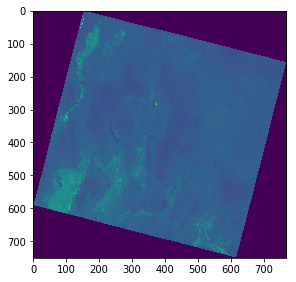

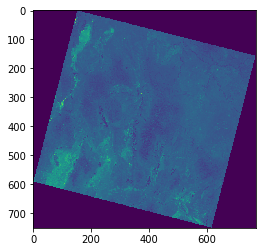

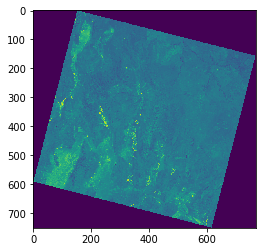

In [11]:
###### TRY TO GET THIS CELL TO RUN WITHOUT CHANGES

import matplotlib.pyplot as plt
from rasterio.plot import show
%matplotlib inline

fig = plt.figure(figsize = (10,10))

with rasterio.open('../temp/LC80420312013156LGN00/blueband_downsampled.TIF') as src:
    blueband = src.read()
    a = fig.add_subplot(2,2,1)
    rasterio.plot.show(blueband)


with rasterio.open('../temp/LC80420312013156LGN00/redband_downsampled.TIF') as src:
    redband = src.read()
    a = fig.add_subplot(2,2,2)
    rasterio.plot.show(redband)
    
with rasterio.open('../temp/LC80420312013156LGN00/nearIRband_downsampled.TIF') as src:
    nirband = src.read()
    a = fig.add_subplot(2,2,3)
    rasterio.plot.show(nirband)

Your images should look like below.

![bands_3_4_5_LC80420312013156LGN00.png MISSING](../images/bands_3_4_5_LC80420312013156LGN00.png)

### Task: Calculate EVI 
Calcuate the EVI Index using the below equation
\begin{equation}
EVI = 2.5\times\frac{NIR-RED}{NIR+6 \times RED - 7.5 \times BLUE + 1}
\end{equation}

In [55]:
# M6:E1:Cell05
##------------
## Calculate EVI
##------------

### CONVERT TO 64-bit float
blueband = blueband.astype(np.float64)
redband = redband.astype(np.float64)
nirband = nirband.astype(np.float64)


### Band Math

EVI = 2.5*((nirband-redband)/(nirband + 6 * redband -7.5 * blueband + 1+ 0.00000001))

EVI[np.where(EVI>=0.3)]= 1
EVI[np.where(EVI<0.3)]= 0

In [44]:
stats = []
stats.append({
            'min':EVI.min(),
            'mean':EVI.mean(),
            'median':np.median(EVI),
            'max':EVI.max()
})
print(stats)

[{'min': -54730.001094600018, 'mean': 16359635.577046072, 'median': 0.71640840585802046, 'max': 1281000000000.0}]


### Task: Visualize the EVI Index
_Tip: Apply log transformation to the EVI if the range of EVI values is too large._

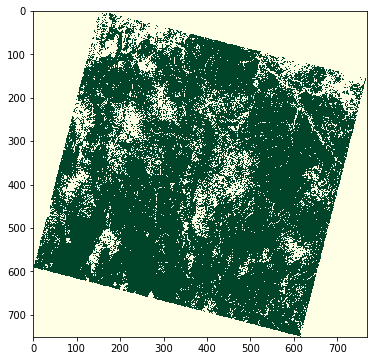

In [56]:
# M6:E1:Cell06

%matplotlib inline
fig = plt.figure(figsize=(6,6))

#### Plot
rasterio.plot.show(EVI, cmap ='YlGn')



Your images should look like below. Use `cmap = "YlGn"`.

![evi_index.png MISSING](../images/evi_index.png)

---

****
# Save your Notebook
## Then, File > Close and Halt